# Various design of experiments in OpenTURNS

The goal of this example is to present several design of experiments available in OpenTURNS. 

## Distribution

In [1]:
import openturns as ot
import openturns.viewer as otv
import pylab as pl

## Monte-Carlo sampling in 2D

In [2]:
dim = 2
X = [ot.Uniform()] * dim
distribution = ot.ComposedDistribution(X)
bounds = distribution.getRange()

In [3]:
sampleSize = 10
sample = distribution.getSample(sampleSize)

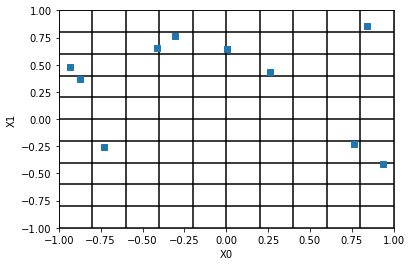

In [4]:
fig = otv.PlotDesign(sample, bounds);

We see that there a empty zones in the input space. 

## Monte-Carlo sampling in 3D

In [5]:
dim = 3
X = [ot.Uniform()] * dim
distribution = ot.ComposedDistribution(X)
bounds = distribution.getRange()

In [6]:
sampleSize = 10
sample = distribution.getSample(sampleSize)

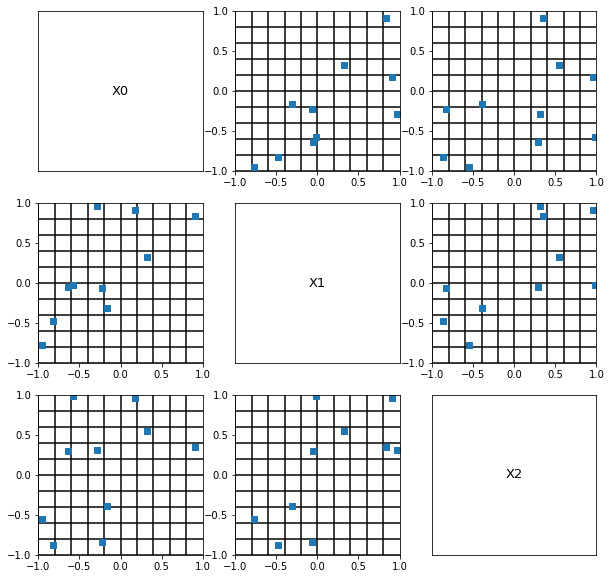

In [7]:
fig = otv.PlotDesign(sample, bounds)
fig.set_size_inches(10, 10)

## Latin Hypercube Sampling

In [8]:
distribution = ot.ComposedDistribution([ot.Uniform()]*3)
samplesize = 5
experiment = ot.LHSExperiment(distribution, samplesize, False, False)
sample = experiment.generate()

In order to see the LHS property, we need to set the bounds. 

In [9]:
bounds = distribution.getRange()

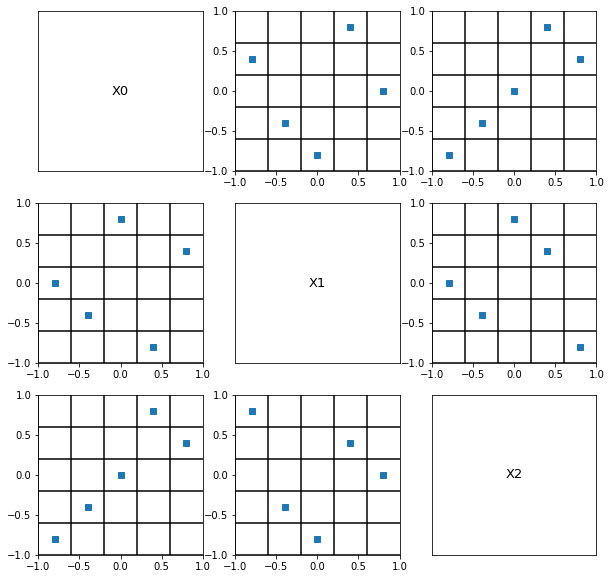

In [10]:
fig = otv.PlotDesign(sample, bounds)
fig.set_size_inches(10, 10)

We see that each column or row exactly contains one single point. This shows that a LHS design of experimens has good 1D projection properties, and, hence, is a good candidate for a space filling design. 

## Optimized LHS

In [11]:
distribution = ot.ComposedDistribution([ot.Uniform()]*3)
samplesize = 10

In [12]:
bounds = distribution.getRange()

In [13]:
lhs = ot.LHSExperiment(distribution, samplesize)
lhs.setAlwaysShuffle(True) # randomized
space_filling = ot.SpaceFillingC2()
temperatureProfile = ot.GeometricProfile(10.0, 0.95, 1000)
algo = ot.SimulatedAnnealingLHS(lhs, temperatureProfile, space_filling)
# optimal design
sample = algo.generate()

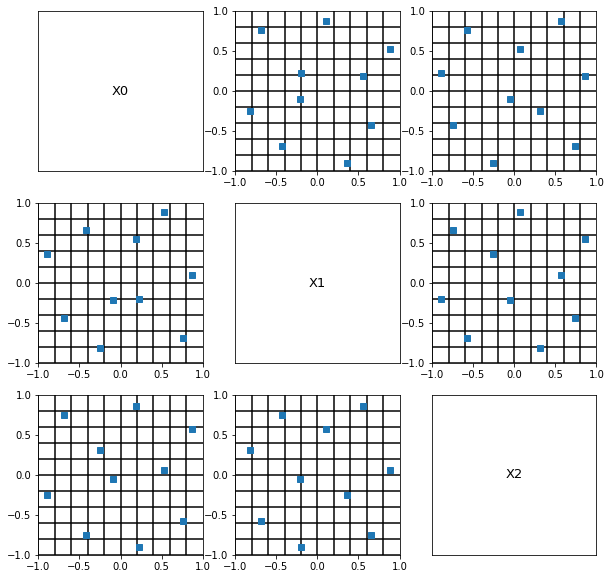

In [14]:
fig = otv.PlotDesign(sample, bounds)
fig.set_size_inches(10, 10)

We see that this LHS is optimized in the sense that it fills the space more evenly than a non-optimized does in general. 

## Sobol' low discrepancy sequence

In [15]:
dim = 2
distribution = ot.ComposedDistribution([ot.Uniform()]*dim)
bounds = distribution.getRange()

In [16]:
sequence = ot.SobolSequence(dim)

In [17]:
samplesize = 2**5 # Sobol' sequences are in base 2
experiment = ot.LowDiscrepancyExperiment(sequence, distribution, samplesize, False)
sample = experiment.generate()

In [18]:
samplesize

32

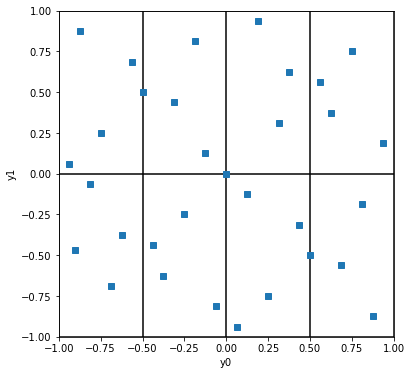

In [19]:
subdivisions = [2**2, 2**1]
fig = otv.PlotDesign(sample, bounds, subdivisions);
fig.set_size_inches(6, 6)

We have elementary intervals in 2 dimensions, each having a volume equal to 1/8. Since there are 32 points, the Sobol' sequence is so that each elementary interval contains exactly 32/8 = 4 points. Notice that each elementary interval is closed on the left (or bottom) and open on the right (or top). 

## Halton low discrepancy sequence

In [20]:
dim = 2
distribution = ot.ComposedDistribution([ot.Uniform()]*dim)
bounds = distribution.getRange()

In [21]:
sequence = ot.HaltonSequence(dim)

In [22]:
samplesize = 2**2 * 3**2 # Halton sequence uses prime numbers 2 and 3 in two dimensions.
experiment = ot.LowDiscrepancyExperiment(sequence, distribution, samplesize, False)
sample = experiment.generate()

In [23]:
samplesize

36

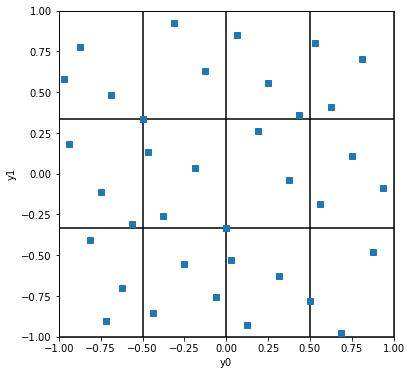

In [24]:
subdivisions = [2**2, 3]
fig = otv.PlotDesign(sample, bounds, subdivisions);
fig.set_size_inches(6, 6)

We have elementary intervals in 2 dimensions, each having a volume equal to 1/12. Since there are 36 points, the Halton sequence is so that each elementary interval contains exactly 36/12 = 3 points. Notice that each elementary interval is closed on the left (or bottom) and open on the right (or top). 